In [3]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.font_manager as fm
font_path = "/content/drive/MyDrive/IT2022/Montserrat-Medium.ttf"
fm.fontManager.addfont(font_path)

Mounted at /content/drive


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load your dataset
path = '/content/drive/MyDrive/IT2022/creditcard.csv'
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Drop non-feature columns if needed
feature_cols = [col for col in df.columns if col not in ['Class']]
X = df[feature_cols]
y = df['Class']

In [7]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=feature_cols)

In [8]:
# Split data (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [9]:
# Train LightGBM
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 295, number of negative: 170589
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.063319 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 170884, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001726 -> initscore=-6.360037
[LightGBM] [Info] Start training from score -6.360037


LGBMClassifier(random_state=42)

In [12]:
# Feature importance
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
12,V12,152
10,V10,148
4,V4,147
14,V14,147
18,V18,140
11,V11,136
8,V8,128
3,V3,114
16,V16,112
17,V17,110


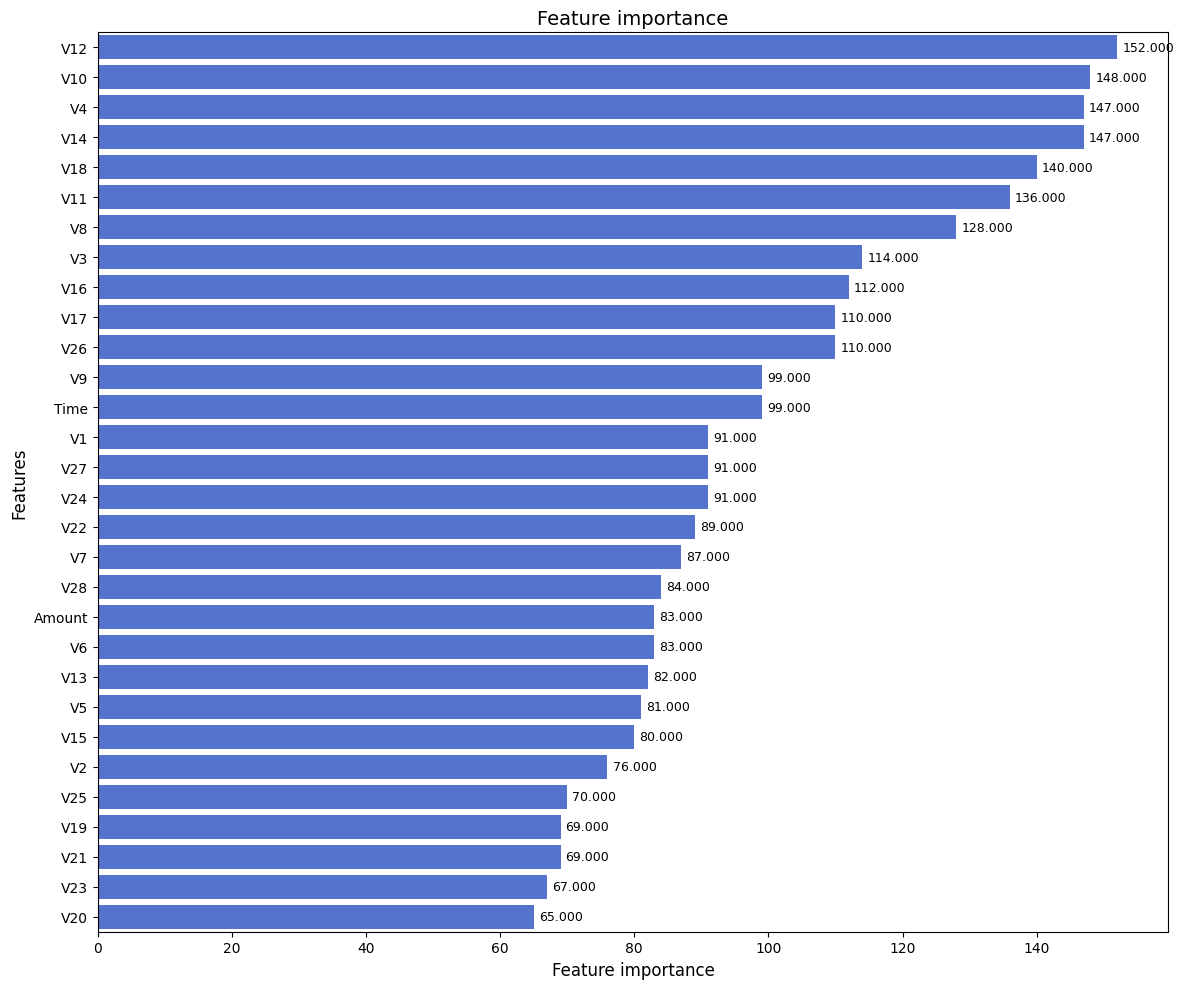

In [13]:
#Plot
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(data=importance_df, y='Feature', x='Importance', color='royalblue')

for i, (value, name) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    plt.text(value + max(importance_df['Importance']) * 0.005,
             i,
             f"{value:,.3f}",
             va='center',
             fontsize=9)

plt.title('Feature importance', fontsize=14)
plt.xlabel('Feature importance', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()